# <b>Question 2</b>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sortedcontainers
import copy
%matplotlib inline

## <b>Part 2.3</b>

(773, 444)


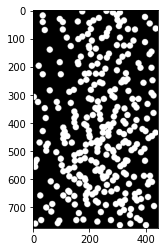

In [2]:
coin = cv2.imread("../images/circles.jpg")
coinG = cv2.cvtColor(coin,cv2.COLOR_BGR2GRAY)
print(coinG.shape)
plt.imshow(coinG,cmap='gray')

In [3]:
coinG[coinG>128] = 255
coinG[coinG<=128] = 0

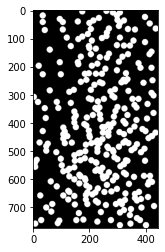

In [4]:
plt.imshow(coinG,cmap='gray')

In [5]:
def padding(pic,k):
    padNum = math.floor(k/2)
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    padPic[xStart:xEnd, yStart:yEnd] = pic
    return padPic

def dilate(img,k1,k2):
    k = max(k1,k2)
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k1,k2),dtype='uint8')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-k1//2:i+k1//2+1,j-k2//2:j+k2//2+1]
            vals = vals*StructE
            out[i,j] = np.max(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out


def erode(img,k1,k2):
    k = max(k1,k2)
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k1,k2),dtype='uint8')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-k1//2:i+k1//2+1,j-k2//2:j+k2//2+1]
            vals = vals*StructE
            out[i,j] = np.min(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out

In [6]:
# def floodFillTwoPass(img):
#     visit = np.zeros_like(img,dtype=np.int64)
#     objC = 0
#     r,c = img.shape
#     for i in range(r):
#         for j in range(c):
#             #Initial row(means no top pixel)
#             if i == 0:
#                 #First pixel(means no left pixel -> create new label
#                 if j == 0 and img[i,j] == 1:
#                     objC+=1
#                     visit[i,j] = objC
#                 else:
#                     #Check left pixel if it is part of foreground -> use prev label
#                     if img[i,j-1] == 1 and img[i,j]==1:
#                         visit[i,j] = visit[i,j-1]
#                     #IF left pixel is not part of fg -> create new label
#                     elif img[i,j]==1:
#                         objC+=1
#                         visit[i,j] = objC
#             else:
#                 #If upper pixel is filled -> use prev label
#                 if img[i,j] ==1 and j==0 and img[i-1,j]==1:
#                     print("hello")
#                     visit[i,j] = visit[i-1,j]
#                 elif img[i,j]==1 and j==0:
#                     objC+=1
#                     visit[i,j] = objC
#                 #Both top and left pixel then use minimum label value
#                 elif img[i,j]==1 and img[i-1,j]==1 and img[i,j-1]==1:
#                     l1 = visit[i-1,j]
#                     l2 = visit[i,j-1]
#                     lNew = min(l1,l2)
#                     visit[i,j] = lNew
#                 #Left and top background
#                 elif img[i,j]==1 and img[i-1,j]==0 and img[i,j-1]==0:
#                     objC+=1
#                     visit[i,j]=objC
#                 #Left is background and top is fg -> use prev pixel
#                 elif img[i,j]==1 and img[i-1,j]==1 and img[i,j-1]==0:
#                     visit[i,j] = visit[i-1,j]
#                 elif img[i,j]==1 and img[i-1,j]==0 and img[i,j-1]==1:
#                     visit[i,j] = visit[i,j-1]
#     return objC,visit

In [7]:
def findRoot(ar, unionIt):
    if unionIt[ar] == ar:
        return ar
    else:
        unionIt[ar] = findRoot(unionIt[ar], unionIt)
        return unionIt[ar]
    
def unionSet(ar1, ar2, unionIt):
    val1 = findRoot(ar1,unionIt)
    val2 = findRoot(ar2,unionIt)
    minVal = min(val1,val2)
    maxVal = max(val1,val2)
    unionIt[maxVal] = minVal


    
    
def connComponents(im):
    next_label = 1;
    labels = np.zeros(im.shape, dtype=int)
    linked = [0]
    h, w = im.shape
    for row in range(h):
        for column in range(w):
            if im[row, column] != 0:
                neighbors = []
                if row > 0:
                    if im[row-1][column] == im[row, column]:
                        neighbors.append((row-1, column))
                if row > 0 and column + 1 < im.shape[1]:
                    if im[row-1, column+1] == im[row, column]:
                        neighbors.append((row-1, column+1))
                if row > 0 and column > 0:
                    if im[row-1, column-1] == im[row, column]:
                        neighbors.append((row-1, column-1))
                if column > 0:
                    if (im[row, column-1] == im[row, column]):
                        neighbors.append((row, column-1))

                if len(neighbors) == 0:
                    linked.append(next_label)
                    labels[row, column] = next_label
                    next_label += 1
                
                else:
                    L = [labels[r, c] for r, c in neighbors]
                    labels[row, column] = min(L)
                    for label in L:
                        unionSet(label, labels[row, column], linked)
                        
    for row in range(im.shape[0]):
        for column in range(im.shape[1]):
            if im[row, column] != 0:
                labels[row, column] = findRoot(labels[row, column], linked)
    return labels


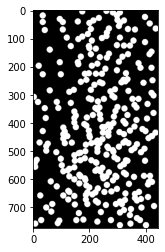

In [8]:
(T,binary_image)=cv2.threshold(coinG,128,255,cv2.THRESH_BINARY)


plt.imshow(binary_image,cmap='gray')
plt.show()

binary_image=binary_image//255

In [9]:
# adjMatrix = np.zeros(binary_image.shape)
r = binary_image.shape[0]
c = binary_image.shape[1]

countHimg = 0

def dfsIter(img,i,j):
    moveAround = np.array([[-1,0],  #Top
                  [0,-1],           #Left
                  [1,0],            #Down
                  [0,1]])           #Right
    for p in range(4):
        indexR = i + moveAround[p][0]
        indexC = j + moveAround[p][1]
        if indexR>=0 and indexR<img.shape[0]:
            if indexC>=0 and indexC<img.shape[1]:
                if adjMatrix[indexR,indexC] == 0 and img[indexR,indexC] == 1:
                    adjMatrix[indexR,indexC] = 1
                    dfsIter(img,indexR,indexC)

def dfsFind(img,i,j,adjMatrix):
    moveAround = np.array([[-1,0],  #Top
                  [0,-1],           #Left
                  [1,0],            #Down
                  [0,1]])           #Right
#     for p in range(4):
    indexR = i
    indexC = j
#     val = 1
    if indexR>=0 and indexR<img.shape[0]:
        if indexC>=0 and indexC<img.shape[1]:
            if adjMatrix[indexR,indexC] == 0 and img[indexR,indexC] == 1:
                adjMatrix[indexR,indexC] = 1
                val = dfsFind(img,indexR+1,indexC,adjMatrix)
                val+= dfsFind(img,indexR-1,indexC,adjMatrix)
                val+= dfsFind(img,indexR,indexC+1,adjMatrix)
                val+= dfsFind(img,indexR,indexC-1,adjMatrix)
                val+=1
#                 if val!=1:
#                     print(val)
                return val
            else:
                return 0
        else: 
            return 0
    else:
        return 0

In [10]:
adjMatrix = np.zeros(binary_image.shape)
for i in range(r):
    for j in range(c):
        if binary_image[i,j] == 1:
            if  i in (0,r-1) or j in (0,c-1):
                if adjMatrix[i,j] == 0:
                    countHimg +=1
                else:
                    countHimg = countHimg
                dfsIter(binary_image,i,j)

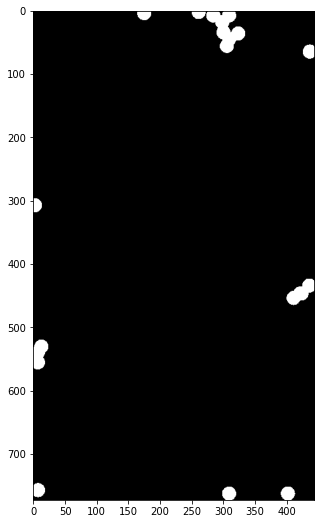

In [11]:
plt.figure(figsize = (9,9))
plt.imshow(adjMatrix,cmap='gray')

In [12]:
adjMatrix1 = np.zeros(binary_image.shape)
adjMatrix2 = np.zeros(binary_image.shape)
for i in range(r):
    for j in range(c):
        if binary_image[i,j] == 1:
                if adjMatrix1[i,j] == 0:
                    countHimg +=1
                else:
                    countHimg = countHimg
                qq = dfsFind(binary_image,i,j,adjMatrix1)
                if qq>=500:
                    dfsFind(binary_image,i,j,adjMatrix2)
#                 print(qq)

In [13]:
nonoverlap = (np.logical_xor(adjMatrix2,binary_image))

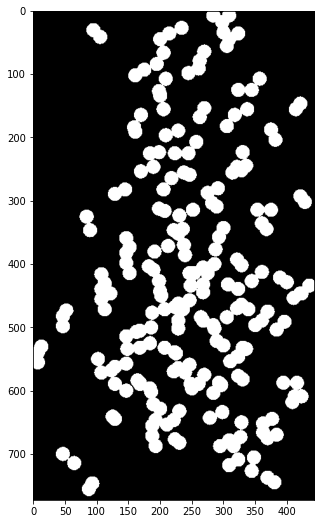

In [14]:
plt.figure(figsize = (9,9))
plt.imshow(adjMatrix2,cmap='gray')

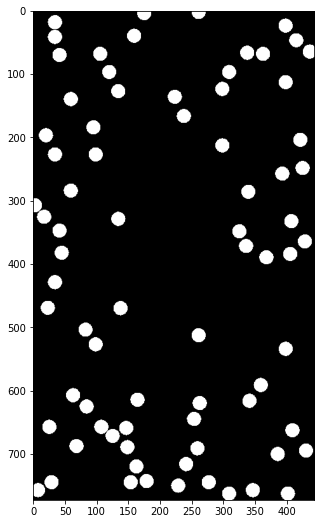

In [15]:
plt.figure(figsize = (9,9))
plt.imshow(nonoverlap,cmap='gray')

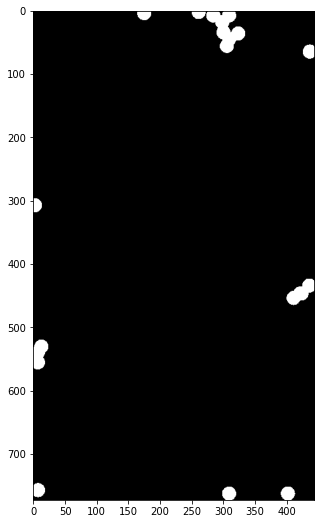

In [16]:
plt.figure(figsize = (9,9))
plt.imshow(adjMatrix,cmap='gray')

In [17]:
adjMatrix1 = np.zeros(binary_image.shape)
adjMatrix2 = np.zeros(binary_image.shape)
for i in range(r):
    for j in range(c):
        if  i in (0,r-1) or j in (0,c-1):
            if binary_image[i,j] == 1:
                    if adjMatrix1[i,j] == 0:
                        countHimg +=1
                    else:
                        countHimg = countHimg
                    qq = dfsFind(adjMatrix,i,j,adjMatrix1)
                    if qq>=1020:
                        dfsFind(adjMatrix,i,j,adjMatrix2)
#                 print(qq)

In [18]:
nonoverlap = (np.logical_xor(adjMatrix2,adjMatrix))

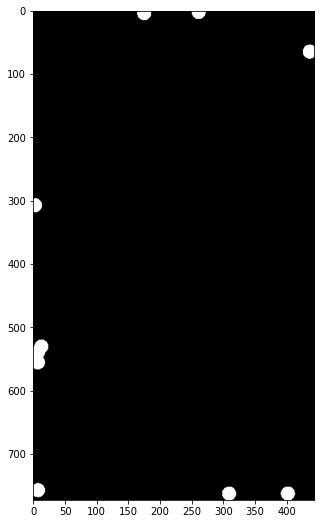

In [19]:
plt.figure(figsize = (9,9))
plt.imshow(nonoverlap,cmap='gray')